In [169]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import yfinance as yf
import polygon
from datetime import timedelta

In [170]:
# Get env vars
import os

print(os.getenv("POLYGONKEY"))


None


In [171]:
api_key = 'dhg8Ow8kaJYZl7ypcw7OgGdGNeA1dSYw'

crypto_client = polygon.CryptoClient(api_key)

In [172]:
currency = 'XMRUSD'

In [173]:
timespan_mutliplier = 1

end = datetime.now()
start = datetime(end.year, end.month, end.day, end.hour, end.minute) - timedelta(hours=50000 * timespan_mutliplier)

previous_close = crypto_client.get_aggregate_bars(currency, "2024-06-01", "2024-10-05", timespan="hour", multiplier=timespan_mutliplier, limit=50000)
previous_close

{'ticker': 'X:XMRUSD',
 'queryCount': 50000,
 'resultsCount': 1448,
 'adjusted': True,
 'results': [{'v': 72.79946651000002,
   'vw': 147.9064,
   'o': 148.26,
   'c': 147.88,
   'h': 148.44,
   'l': 147.45,
   't': 1717200000000,
   'n': 72},
  {'v': 107.43775269000001,
   'vw': 147.7319,
   'o': 147.91,
   'c': 147.94,
   'h': 148.25,
   'l': 147.29,
   't': 1717203600000,
   'n': 86},
  {'v': 192.32730304999993,
   'vw': 148.7119,
   'o': 147.83,
   'c': 149,
   'h': 149.45,
   'l': 147.83,
   't': 1717207200000,
   'n': 138},
  {'v': 266.48373689,
   'vw': 149.4444,
   'o': 149.29,
   'c': 149.74,
   'h': 149.91,
   'l': 149,
   't': 1717210800000,
   'n': 202},
  {'v': 131.363072,
   'vw': 149.4932,
   'o': 149.74,
   'c': 149.3,
   'h': 149.82,
   'l': 149.1,
   't': 1717214400000,
   'n': 98},
  {'v': 116.96403451,
   'vw': 149.4958,
   'o': 149.37,
   'c': 149.41,
   'h': 149.88,
   'l': 149.23,
   't': 1717218000000,
   'n': 62},
  {'v': 254.02740613,
   'vw': 149.962,
   'o':

In [174]:
start

datetime.datetime(2019, 1, 21, 16, 24)

In [175]:
end

datetime.datetime(2024, 10, 5, 0, 24, 44, 83558)

In [176]:
results = previous_close["results"]

# create dataframe
df = pd.DataFrame(results)
df

,v,vw,o,c,h,l,t,n
0,72.799467,147.9064,148.26,147.88,148.44,147.45,1717200000000,72
1,107.437753,147.7319,147.91,147.94,148.25,147.29,1717203600000,86
2,192.327303,148.7119,147.83,149.00,149.45,147.83,1717207200000,138
3,266.483737,149.4444,149.29,149.74,149.91,149.00,1717210800000,202
4,131.363072,149.4932,149.74,149.30,149.82,149.10,1717214400000,98
...,...,...,...,...,...,...,...,...
1443,117.759249,158.6158,158.22,158.96,159.12,158.22,1722394800000,83
1444,345.833849,159.3146,158.65,159.30,159.89,158.48,1722398400000,180
1445,46.590796,159.1892,159.43,159.31,159.68,159.10,1722402000000,52
1446,320.586797,159.5257,159.20,159.79,160.25,159.00,1722405600000,121


In [177]:
290/2/24

6.041666666666667

In [178]:
df = df.rename(columns={'t': 'timestamp', 'o': 'open', 'c': 'close', 'h': 'high', 'l': 'low', 'v': 'volume', 'n': 'number_of_transactions', 'vw': 'volume_weighted_average_price'})
df

,volume,volume_weighted_average_price,open,close,high,low,timestamp,number_of_transactions
0,72.799467,147.9064,148.26,147.88,148.44,147.45,1717200000000,72
1,107.437753,147.7319,147.91,147.94,148.25,147.29,1717203600000,86
2,192.327303,148.7119,147.83,149.00,149.45,147.83,1717207200000,138
3,266.483737,149.4444,149.29,149.74,149.91,149.00,1717210800000,202
4,131.363072,149.4932,149.74,149.30,149.82,149.10,1717214400000,98
...,...,...,...,...,...,...,...,...
1443,117.759249,158.6158,158.22,158.96,159.12,158.22,1722394800000,83
1444,345.833849,159.3146,158.65,159.30,159.89,158.48,1722398400000,180
1445,46.590796,159.1892,159.43,159.31,159.68,159.10,1722402000000,52
1446,320.586797,159.5257,159.20,159.79,160.25,159.00,1722405600000,121


In [179]:
# convert timestamp to datetime
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
df

,volume,volume_weighted_average_price,open,close,high,low,timestamp,number_of_transactions,date
0,72.799467,147.9064,148.26,147.88,148.44,147.45,1717200000000,72,2024-06-01 00:00:00
1,107.437753,147.7319,147.91,147.94,148.25,147.29,1717203600000,86,2024-06-01 01:00:00
2,192.327303,148.7119,147.83,149.00,149.45,147.83,1717207200000,138,2024-06-01 02:00:00
3,266.483737,149.4444,149.29,149.74,149.91,149.00,1717210800000,202,2024-06-01 03:00:00
4,131.363072,149.4932,149.74,149.30,149.82,149.10,1717214400000,98,2024-06-01 04:00:00
...,...,...,...,...,...,...,...,...,...
1443,117.759249,158.6158,158.22,158.96,159.12,158.22,1722394800000,83,2024-07-31 03:00:00
1444,345.833849,159.3146,158.65,159.30,159.89,158.48,1722398400000,180,2024-07-31 04:00:00
1445,46.590796,159.1892,159.43,159.31,159.68,159.10,1722402000000,52,2024-07-31 05:00:00
1446,320.586797,159.5257,159.20,159.79,160.25,159.00,1722405600000,121,2024-07-31 06:00:00


<Axes: xlabel='date', ylabel='close'>

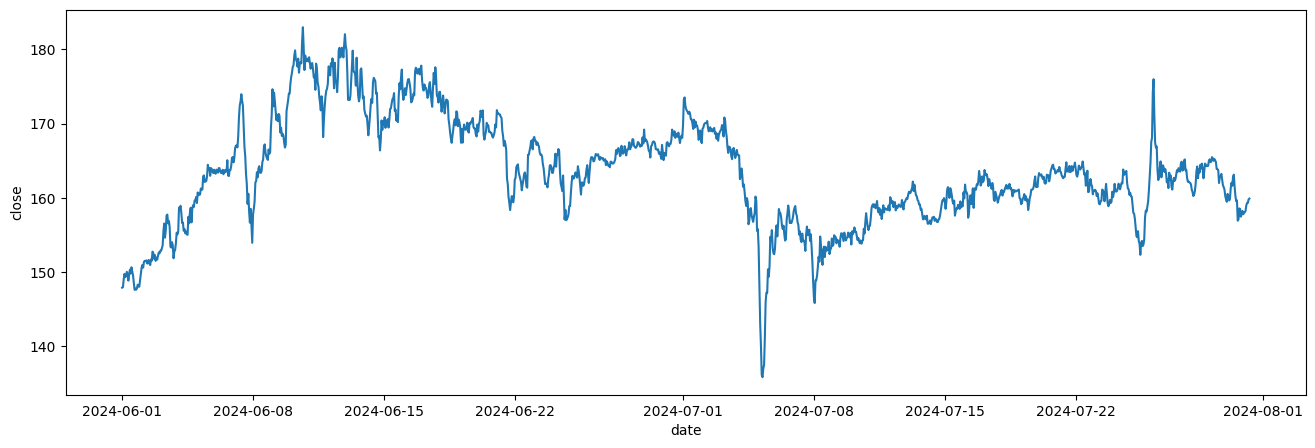

In [180]:
plt.figure(figsize=(16, 5))
sns.lineplot(x="date", y="close", data=df)

In [181]:
df

,volume,volume_weighted_average_price,open,close,high,low,timestamp,number_of_transactions,date
0,72.799467,147.9064,148.26,147.88,148.44,147.45,1717200000000,72,2024-06-01 00:00:00
1,107.437753,147.7319,147.91,147.94,148.25,147.29,1717203600000,86,2024-06-01 01:00:00
2,192.327303,148.7119,147.83,149.00,149.45,147.83,1717207200000,138,2024-06-01 02:00:00
3,266.483737,149.4444,149.29,149.74,149.91,149.00,1717210800000,202,2024-06-01 03:00:00
4,131.363072,149.4932,149.74,149.30,149.82,149.10,1717214400000,98,2024-06-01 04:00:00
...,...,...,...,...,...,...,...,...,...
1443,117.759249,158.6158,158.22,158.96,159.12,158.22,1722394800000,83,2024-07-31 03:00:00
1444,345.833849,159.3146,158.65,159.30,159.89,158.48,1722398400000,180,2024-07-31 04:00:00
1445,46.590796,159.1892,159.43,159.31,159.68,159.10,1722402000000,52,2024-07-31 05:00:00
1446,320.586797,159.5257,159.20,159.79,160.25,159.00,1722405600000,121,2024-07-31 06:00:00


In [182]:
df.to_parquet("../data/data.parquet")